# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
## –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [55]:
# –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from phik.report import plot_correlation_matrix

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
# –∑–∞–≥—Ä—É–∑–∏–º —Ñ–∞–π–ª –∏ –∏–∑—É—á–∏–º –æ–±—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –Ω–µ–º:
df = pd.read_csv('Autos.csv')
df.head()

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  2016-03-24 11:52:17    480         NaN              1993  manual      0   
1  2016-03-24 10:58:45  18300       coupe              2011  manual    190   
2  2016-03-14 12:52:21   9800         suv              2004    auto    163   
3  2016-03-17 16:54:04   1500       small              2001  manual     75   
4  2016-03-31 17:25:20   3600       small              2008  manual     69   

   Model  Kilometer  RegistrationMonth  FuelType       Brand Repaired  \
0   golf     150000                  0    petrol  volkswagen      NaN   
1    NaN     125000                  5  gasoline        audi      yes   
2  grand     125000                  8  gasoline        jeep      NaN   
3   golf     150000                  6    petrol  volkswagen       no   
4  fabia      90000                  7  gasoline       skoda       no   

           DateCreated  NumberOfPictures  PostalCode             LastSeen  
0  2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
# –Ω–∞–π–¥–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [5]:
# –Ω–∞–π–¥–µ–º —è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã:
df.duplicated().sum()

4

In [6]:
# —É–¥–∞–ª–∏–º —è–≤–Ω—ã–µ –¥—É–±–ª–∏–∫–∞—Ç—ã:
df = df.drop_duplicates()

–û–ø—Ä–µ–¥–µ–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏, –≤–∞–∂–Ω—ã–µ –¥–ª—è –º–æ–¥–µ–ª–∏.

–ö –∑–Ω–∞—á–∏–º—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º –æ—Ç–Ω–µ—Å–µ–º —Å–ª–µ–¥—É—é—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã:

- VehicleType. –¢–∏–ø –º–∞—à–∏–Ω—ã –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –µ–µ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª. –ß–µ–º –±–æ–ª—å—à–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π —É –º–∞—à–∏–Ω—ã, —Ç–µ–º –≤—ã—à–µ —Ü–µ–Ω–∞.
- Gearbox. –ù–∞–ª–∏—á–∏–µ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–π –∫–æ—Ä–æ–±–∫–∏ –ø–µ—Ä–µ–¥–∞—á –ø–æ–≤—ã—à–∞–µ—Ç —Å—Ç–æ–∏–º–æ—Å—Ç—å –º–∞—à–∏–Ω—ã –∏–∑-–∑–∞ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏.
- Power. –ú–æ—â–Ω–æ—Å—Ç—å –≤ –ª–æ—à–∞–¥–∏–Ω—ã—Ö —Å–∏–ª–∞—Ö (–¥–∞–ª–µ–µ –ª.—Å.) –Ω–∞–ø—Ä—è–º—É—é –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–Ω—É.
- Kilometer. –ò–º–µ–µ—Ç –æ–±—Ä–∞—Ç–Ω–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç —Ü–µ–Ω—ã. –ß–µ–º –±–æ–ª—å—à–µ –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤ –ø—Ä–æ–µ—Ö–∞–ª–∞ –º–∞—à–∏–Ω–∞, —Ç–µ–º –º–µ–Ω—å—à–µ –µ–µ –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç—å –∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, —Ü–µ–Ω–∞.
- FuelType. –¢–∏–ø —Ç–æ–ø–ª–∏–≤–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—é –¥–≤–∏–≥–∞—Ç–µ–ª—è –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–≥–æ —Å–≥–æ—Ä–∞–Ω–∏—è.
- Brand. –ö–æ–Ω—Ü–µ—Ä–Ω/–∫–æ–º–ø–∞–Ω–∏—è, –∫–æ—Ç–æ—Ä–∞—è —Å–æ–∑–¥–∞–ª–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—å, –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –∏ –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç—å –∞–≤—Ç–æ–º–æ–±–∏–ª—è.
- Repaired. –ú–∞—à–∏–Ω—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–±—ã–≤–∞–ª–∏ –≤ –¥–æ—Ä–æ–∂–Ω–æ-—Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω—ã—Ö –ø—Ä–æ–∏—Å—à–µ—Å—Ç–≤–∏—è—Ö, –ø–æ–¥–≤–µ—Ä–≥–ª–∏—Å—å –∏–∑–º–µ–Ω–µ–Ω–∏—è–º, –∏ –∏—Ö –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç—å –Ω–∏–∂–µ.
- RegistrationYear. –ì–æ–¥ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç, —Å–∫–æ–ª—å–∫–æ —É–∂–µ –ª–µ—Ç –º–∞—à–∏–Ω–∞ –Ω–∞ —Ö–æ–¥—É, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, —á–µ–º –±–æ–ª—å—à–µ –≤–æ–∑—Ä–∞—Å—Ç, —Ç–µ–º –º–µ–Ω—å—à–µ —Ü–µ–Ω–∞.
- Model. –¢–æ–∂–µ –º–æ–∂–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å —É –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π.

–û—Å—Ç–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –¥–ª—è –º–æ–¥–µ–ª–∏ –Ω–µ —Ç—Ä–µ–±—É—é—Ç—Å—è, —Ç–∞–∫ –∫–∞–∫ –Ω–µ –≤–ª–∏—è—é—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∏ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º–∏: 
- DateCrawled (–¥–∞—Ç–∞ —Å–∫–∞—á–∏–≤–∞–Ω–∏—è –∞–Ω–∫–µ—Ç—ã –∏–∑ –±–∞–∑—ã), 
- RegistrationMonth(–º–µ—Å—è—Ü —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª—è), 
- DateCreated (–¥–∞—Ç–∞ —Å–æ–∑–¥–∞–Ω–∏—è –∞–Ω–∫–µ—Ç—ã), 
- NumberOfPictures (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–π –∞–≤—Ç–æ–º–æ–±–∏–ª—è), 
- PostalCode (–ø–æ—á—Ç–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –≤–ª–∞–¥–µ–ª—å—Ü–∞ –∞–Ω–∫–µ—Ç—ã (–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è)),
- LastSeen (–¥–∞—Ç–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è).

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354365 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354365 non-null  object
 1   Price              354365 non-null  int64 
 2   VehicleType        316875 non-null  object
 3   RegistrationYear   354365 non-null  int64 
 4   Gearbox            334532 non-null  object
 5   Power              354365 non-null  int64 
 6   Model              334660 non-null  object
 7   Kilometer          354365 non-null  int64 
 8   RegistrationMonth  354365 non-null  int64 
 9   FuelType           321470 non-null  object
 10  Brand              354365 non-null  object
 11  Repaired           283211 non-null  object
 12  DateCreated        354365 non-null  object
 13  NumberOfPictures   354365 non-null  int64 
 14  PostalCode         354365 non-null  int64 
 15  LastSeen           354365 non-null  object
dtypes: int64(7), object(9)
me

In [8]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –∑–Ω–∞—á–µ–Ω–∏—è:
df.describe(include='all')

DateCrawled          Price VehicleType  RegistrationYear  \
count                354365  354365.000000      316875     354365.000000   
unique               271174            NaN           8               NaN   
top     2016-03-24 14:49:47            NaN       sedan               NaN   
freq                      7            NaN       91457               NaN   
mean                    NaN    4416.679830         NaN       2004.234481   
std                     NaN    4514.176349         NaN         90.228466   
min                     NaN       0.000000         NaN       1000.000000   
25%                     NaN    1050.000000         NaN       1999.000000   
50%                     NaN    2700.000000         NaN       2003.000000   
75%                     NaN    6400.000000         NaN       2008.000000   
max                     NaN   20000.000000         NaN       9999.000000   

       Gearbox          Power   Model      Kilometer  RegistrationMonth  \
count   334532  354365.000000  334660  354365.000000      354365.000000   
unique       2            NaN     250            NaN                NaN   
top     manual            NaN    golf            NaN                NaN   
freq    268249            NaN   29232            NaN                NaN   
mean       NaN     110.093816     NaN  128211.363989           5.714650   
std        NaN     189.851330     NaN   37905.083858           3.726432   
min        NaN       0.000000     NaN    5000.000000           0.000000   
25%        NaN      69.000000     NaN  125000.000000           3.000000   
50%        NaN     105.000000     NaN  150000.000000           6.000000   
75%        NaN     143.000000     NaN  150000.000000           9.000000   
max        NaN   20000.000000     NaN  150000.000000          12.000000   

       FuelType       Brand Repaired          DateCreated  NumberOfPictures  \
count    321470      354365   283211               354365          354365.0   
unique        7          40        2                  109               NaN   
top      petrol  volkswagen       no  2016-04-03 00:00:00               NaN   
freq     216349       77012   247158                13718               NaN   
mean        NaN         NaN      NaN                  NaN               0.0   
std         NaN         NaN      NaN                  NaN               0.0   
min         NaN         NaN      NaN                  NaN               0.0   
25%         NaN         NaN      NaN                  NaN               0.0   
50%         NaN         NaN      NaN                  NaN               0.0   
75%         NaN         NaN      NaN                  NaN               0.0   
max         NaN         NaN      NaN                  NaN               0.0   

           PostalCode             LastSeen  
count   354365.000000               354365  
unique            NaN               179150  
top               NaN  2016-04-06 13:45:54  
freq              NaN                   17  
mean     50508.503800                  NaN  
std      25783.100078                  NaN  
min       1067.000000                  NaN  
25%      30165.000000                  NaN  
50%      49413.000000                  NaN  
75%      71083.000000                  NaN  
max      99998.000000                  NaN

–°—Ç–æ–ª–±—Ü—ã, —Ç—Ä–µ–±—É—é—â–∏–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏:

- VehicleType. –î–ª—è –≤—Å–µ—Ö NaN —É—Å—Ç–∞–Ω–æ–≤–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ 'unknown'.
- Gearbox. –î–ª—è –≤—Å–µ—Ö NaN —É—Å—Ç–∞–Ω–æ–≤–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ 'unknown'.
- Power. –°–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –º–∞—à–∏–Ω–∞—Ö. –ò–º–µ—Ç—å 20000 –ª.—Å. –¥–ª—è –º–∞—à–∏–Ω—ã –Ω–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç –Ω–µ—Ä–µ–∞–ª—å–Ω–æ.
- FuelType. –í–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –ø–æ–ø—É–ª—è—Ä–Ω–æ–º—É —Ç–∏–ø—É. ????????????
- Repaired. –î–ª—è –≤—Å–µ—Ö NaN —É—Å—Ç–∞–Ω–æ–≤–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ 'no'. ?????????
- RegistrationYear. –°–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –º–∞—à–∏–Ω–∞—Ö.
- Model. –î–ª—è –≤—Å–µ—Ö NaN —É—Å—Ç–∞–Ω–æ–≤–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ 'unknown'.

### –û–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤
#### –ü—Ä–∏–∑–Ω–∞–∫ RegistrationYear

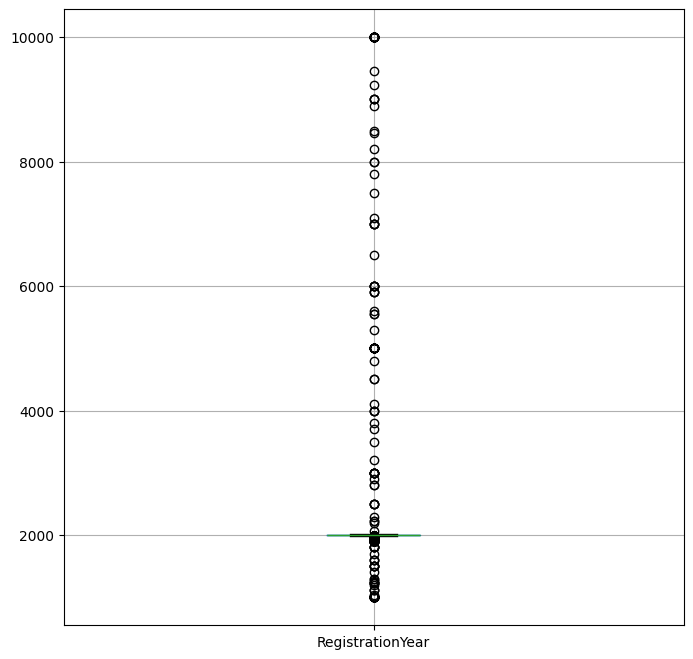

In [9]:
df.boxplot(column=['RegistrationYear'], figsize=(8,8))
plt.show()

In [10]:
# –Ω–∞–π–¥–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ RegistrationYear –∏ –≤—ã–ø–æ–ª–Ω–∏–º —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫—É –ø–æ –∏–Ω–¥–µ–∫—Å—É:
df['RegistrationYear'].value_counts().sort_index()

RegistrationYear
1000    37
1001     1
1039     1
1111     3
1200     1
        ..
9000     3
9229     1
9450     1
9996     1
9999    26
Name: count, Length: 151, dtype: int64

In [11]:
# –ø—Ä–æ–≤–µ—Ä–∏–º –¥–∞—Ç—ã —Å–∫–∞—á–∏–≤–∞–Ω–∏—è –∞–Ω–∫–µ—Ç –∏–∑ –±–∞–∑—ã:
print(df['DateCrawled'].min())
print(df['DateCrawled'].max())

2016-03-05 14:06:22
2016-04-07 14:36:58


–ü–æ—Å–∫–æ–ª—å–∫—É –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –Ω–∞ 2016 –≥–æ–¥, –∑–∞–º–µ–Ω–∏–º –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å –≥–æ–¥–æ–º –ø–æ—Å–ª–µ 2016 –Ω–∞ 2016, –∏, –ø–æ—Å–∫–æ–ª—å–∫—É –∞–≤—Ç–æ–º–æ–±–∏–ª–∏ –¥–æ 1930 –≥–æ–¥–∞ - —ç—Ç–æ —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∞–Ω–æ–º–∞–ª–∏–∏, –∑–∞–º–µ–Ω–∏–º –∏—Ö —Ç–æ–∂–µ.

In [12]:
# –æ–±—Ä–∞–±–æ—Ç–∞–µ–º –≤—ã–±—Ä–æ—Å—ã –≤ —Å—Ç–æ–ª–±—Ü–µ RegistrationYear: 
def balance_reg_year(value):
    if value > 2016:
        return 2016
    elif value < 1930:
        return 1930
    else:
        return value

df["RegistrationYear"] = df["RegistrationYear"].apply(balance_reg_year)

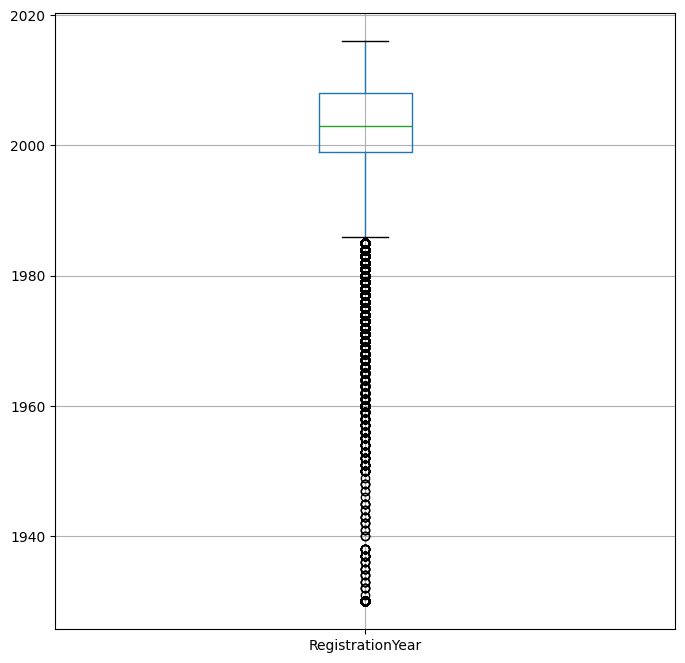

In [13]:
df.boxplot(column=['RegistrationYear'], figsize=(8,8))
plt.show()

#### –ü—Ä–∏–∑–Ω–∞–∫ Power

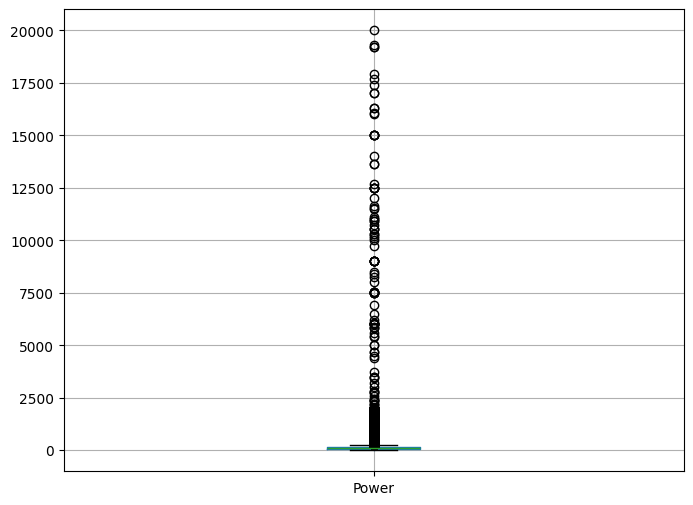

In [14]:
df.boxplot(column=['Power'], figsize=(8,6))
plt.show()

In [15]:
# –Ω–∞–π–¥–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ Power –∏ –≤—ã–ø–æ–ª–Ω–∏–º —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫—É –ø–æ –∏–Ω–¥–µ–∫—Å—É:
df['Power'].value_counts().sort_index()

Power
0        40225
1           34
2           10
3            9
4           30
         ...  
17932        1
19208        1
19211        1
19312        1
20000        1
Name: count, Length: 712, dtype: int64

In [16]:
# –æ–≥—Ä–∞–Ω–∏—á–∏–º –ø—Ä–∏–∑–Ω–∞–∫ Power 3500 –ª.—Å.:
df["Power"] = df["Power"].apply(lambda x: 3500 if x > 3500 else x)

–ü–æ—Å–∫–æ–ª—å–∫—É –∏–º–µ—Ç—å 0 –ª.—Å. –¥–ª—è –º–∞—à–∏–Ω—ã –Ω–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç –Ω–µ—Ä–µ–∞–ª—å–Ω–æ, –∏–∑—É—á–∏–º —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ.

In [17]:
# –ø–æ—Å—á–∏—Ç–∞–µ–º, –∫–∞–∫–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∑–∞–Ω–∏–º–∞—é—Ç —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –º–æ—â–Ω–æ—Å—Ç—å –¥–≤–∏–≥–∞—Ç–µ–ª—è —É–∫–∞–∑–∞–Ω–∞ –∫–∞–∫ 0:
print('{:.2f}'.format(df[df['Power'] == 0].shape[0]/df.shape[0]*100))

11.35


In [18]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–∞—Ä–∫–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π, –º–æ—â–Ω–æ—Å—Ç—å –∫–æ—Ç–æ—Ä—ã—Ö —É–∫–∞–∑–∞–Ω–∞ –∫–∞–∫ 0:
df[df['Power'] == 0]['Model'].value_counts()

Model
other         3169
golf          2460
corsa         1771
polo          1611
3er           1534
              ... 
serie_3          1
b_max            1
amarok           1
yeti             1
elefantino       1
Name: count, Length: 247, dtype: int64

In [19]:
# –∑–∞–º–µ–Ω–∏–º –Ω—É–ª–∏ –Ω–∞ —Å–∞–º–æ–µ —á–∞—Å—Ç–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π:
for model in df['Model'].unique():
    try:
        if df[df['Model'] == model]['Power'].value_counts().index[0] == 0:
            new_value = df[df['Model'] == model]['Power'].value_counts().index[1]
            df.loc[(df['Power'] == 0) & (df['Model'] == model), 'Power'] = new_value
        else:
            new_value = df[df['Model'] == model]['Power'].value_counts().index[0]
            df.loc[(df['Power'] == 0) & (df['Model'] == model), 'Power'] = new_value
    except:
        IndexError

In [20]:
# –ø—Ä–æ–≤–µ—Ä–∏–º, –æ—Å—Ç–∞–ª–∏—Å—å –ª–∏ –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ –≤ –∫–∞–∫–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ:
print('{:.2f}'.format(df[df['Power'] == 0].shape[0]/df.shape[0]*100))

1.78


In [21]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ:
df[df['Power'] == 0]

DateCrawled  Price VehicleType  RegistrationYear Gearbox  \
115     2016-03-20 18:53:27      0       small              1999     NaN   
160     2016-03-19 19:49:15    500       small              1999  manual   
260     2016-04-04 09:49:59    450         NaN              2016  manual   
306     2016-03-21 14:38:37    200         NaN              2009     NaN   
308     2016-03-13 13:38:54   1600       wagon              1999  manual   
...                     ...    ...         ...               ...     ...   
354080  2016-04-03 20:37:39   4300       small              2008    auto   
354083  2016-03-30 07:54:17      0         NaN              2000     NaN   
354162  2016-03-07 19:51:14   1500         NaN              1995     NaN   
354338  2016-03-31 19:52:33    180         NaN              1995     NaN   
354365  2016-03-14 17:48:27   2200         NaN              2005     NaN   

        Power Model  Kilometer  RegistrationMonth FuelType           Brand  \
115         0   NaN       5000                  0   petrol      volkswagen   
160         0   NaN     150000                  0   petrol         renault   
260         0   NaN     150000                  3   petrol      mitsubishi   
306         0   NaN      10000                  0      NaN  sonstige_autos   
308         0   NaN     150000                  6   petrol             bmw   
...       ...   ...        ...                ...      ...             ...   
354080      0   NaN     150000                  3      NaN           honda   
354083      0   NaN     150000                  0      NaN  sonstige_autos   
354162      0   NaN     150000                  0      NaN      volkswagen   
354338      0   NaN     125000                  3   petrol            opel   
354365      0   NaN      20000                  1      NaN  sonstige_autos   

       Repaired          DateCreated  NumberOfPictures  PostalCode  \
115         NaN  2016-03-20 00:00:00                 0       37520   
160          no  2016-03-19 00:00:00                 0       26969   
260          no  2016-04-04 00:00:00                 0       59302   
306         NaN  2016-03-21 00:00:00                 0        6493   
308          no  2016-03-13 00:00:00                 0       41199   
...         ...                  ...               ...         ...   
354080      NaN  2016-04-03 00:00:00                 0       30627   
354083      NaN  2016-03-30 00:00:00                 0        6686   
354162      NaN  2016-03-07 00:00:00                 0       26789   
354338      NaN  2016-03-31 00:00:00                 0       41470   
354365      NaN  2016-03-14 00:00:00                 0       39576   

                   LastSeen  
115     2016-04-07 02:45:22  
160     2016-04-01 11:17:48  
260     2016-04-06 11:17:11  
306     2016-03-24 02:47:34  
308     2016-03-28 12:46:35  
...                     ...  
354080  2016-04-05 21:16:51  
354083  2016-04-06 23:46:19  
354162  2016-04-03 11:46:59  
354338  2016-04-06 14:18:04  
354365  2016-04-06 00:46:52  

[6296 rows x 16 columns]

In [22]:
df.loc[(df['Power'] == 0) & df['Model'].isna()]

DateCrawled  Price VehicleType  RegistrationYear Gearbox  \
115     2016-03-20 18:53:27      0       small              1999     NaN   
160     2016-03-19 19:49:15    500       small              1999  manual   
260     2016-04-04 09:49:59    450         NaN              2016  manual   
306     2016-03-21 14:38:37    200         NaN              2009     NaN   
308     2016-03-13 13:38:54   1600       wagon              1999  manual   
...                     ...    ...         ...               ...     ...   
354080  2016-04-03 20:37:39   4300       small              2008    auto   
354083  2016-03-30 07:54:17      0         NaN              2000     NaN   
354162  2016-03-07 19:51:14   1500         NaN              1995     NaN   
354338  2016-03-31 19:52:33    180         NaN              1995     NaN   
354365  2016-03-14 17:48:27   2200         NaN              2005     NaN   

        Power Model  Kilometer  RegistrationMonth FuelType           Brand  \
115         0   NaN       5000                  0   petrol      volkswagen   
160         0   NaN     150000                  0   petrol         renault   
260         0   NaN     150000                  3   petrol      mitsubishi   
306         0   NaN      10000                  0      NaN  sonstige_autos   
308         0   NaN     150000                  6   petrol             bmw   
...       ...   ...        ...                ...      ...             ...   
354080      0   NaN     150000                  3      NaN           honda   
354083      0   NaN     150000                  0      NaN  sonstige_autos   
354162      0   NaN     150000                  0      NaN      volkswagen   
354338      0   NaN     125000                  3   petrol            opel   
354365      0   NaN      20000                  1      NaN  sonstige_autos   

       Repaired          DateCreated  NumberOfPictures  PostalCode  \
115         NaN  2016-03-20 00:00:00                 0       37520   
160          no  2016-03-19 00:00:00                 0       26969   
260          no  2016-04-04 00:00:00                 0       59302   
306         NaN  2016-03-21 00:00:00                 0        6493   
308          no  2016-03-13 00:00:00                 0       41199   
...         ...                  ...               ...         ...   
354080      NaN  2016-04-03 00:00:00                 0       30627   
354083      NaN  2016-03-30 00:00:00                 0        6686   
354162      NaN  2016-03-07 00:00:00                 0       26789   
354338      NaN  2016-03-31 00:00:00                 0       41470   
354365      NaN  2016-03-14 00:00:00                 0       39576   

                   LastSeen  
115     2016-04-07 02:45:22  
160     2016-04-01 11:17:48  
260     2016-04-06 11:17:11  
306     2016-03-24 02:47:34  
308     2016-03-28 12:46:35  
...                     ...  
354080  2016-04-05 21:16:51  
354083  2016-04-06 23:46:19  
354162  2016-04-03 11:46:59  
354338  2016-04-06 14:18:04  
354365  2016-04-06 00:46:52  

[6294 rows x 16 columns]

–û—Å—Ç–∞–µ—Ç—Å—è 6296 —Å—Ç—Ä–æ–∫ (–º–µ–Ω—å—à–µ 2% –¥–∞—Ç–∞—Å–µ—Ç–∞), –≤ –∫–æ—Ç–æ—Ä—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ Power —Ä–∞–≤–Ω—ã –Ω—É–ª—é, –∏ –≤–æ –≤—Å–µ—Ö —ç—Ç–∏—Ö —Å—Ç—Ä–æ–∫–∞—Ö –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π (–ø—Ä–æ–ø—É—Å–∫–∏).

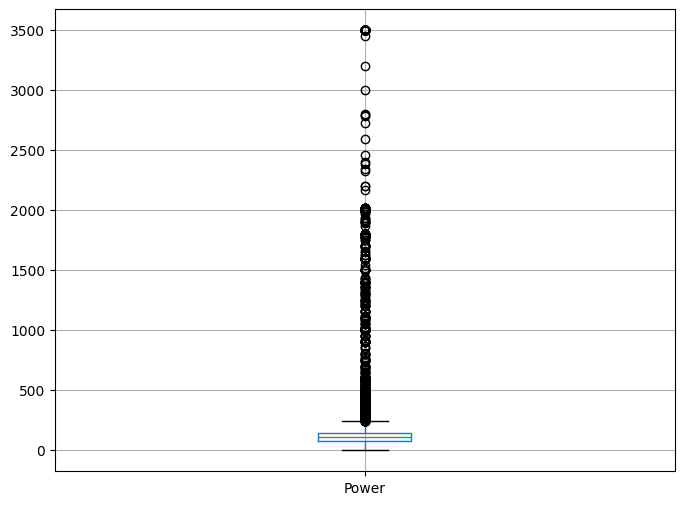

In [23]:
df.boxplot(column=['Power'], figsize=(8,6))
plt.show()

### –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

In [24]:
# –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–π —Å–ø–∏—Å–æ–∫ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

DateCrawled - 0.0%
Price - 0.0%
VehicleType - 10.58%
RegistrationYear - 0.0%
Gearbox - 5.6%
Power - 0.0%
Model - 5.56%
Kilometer - 0.0%
RegistrationMonth - 0.0%
FuelType - 9.28%
Brand - 0.0%
Repaired - 20.08%
DateCreated - 0.0%
NumberOfPictures - 0.0%
PostalCode - 0.0%
LastSeen - 0.0%


#### –ü—Ä–∏–∑–Ω–∞–∫ VehicleType

In [25]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–∞—Ä–∫–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ VehicleType:
df[df['VehicleType'].isna()]['Model'].value_counts()

Model
golf          4035
other         1859
polo          1600
corsa         1576
3er           1312
              ... 
200              1
rangerover       1
serie_1          1
q3               1
b_max            1
Name: count, Length: 241, dtype: int64

In [26]:
# –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å–∞–º—ã–º —á–∞—Å—Ç—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π:
for model in df['Model'].unique():
    try:
        veh_type_imp = df[df['Model'] == model]['VehicleType'].value_counts().index[0]
        df.loc[(df['VehicleType'].isna()) & (df['Model'] == model), 'VehicleType'] = veh_type_imp
    except:
        IndexError

In [27]:
# –ø—Ä–æ–≤–µ—Ä–∏–º, –æ—Å—Ç–∞–ª–∏—Å—å –ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –∏ –≤ –∫–∞–∫–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ:
print('{:.2f}'.format(df[df['VehicleType'].isna()].shape[0]/df.shape[0]*100))

1.93


In [28]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ:
df[df['VehicleType'].isna()]

DateCrawled  Price VehicleType  RegistrationYear Gearbox  \
260     2016-04-04 09:49:59    450         NaN              2016  manual   
306     2016-03-21 14:38:37    200         NaN              2009     NaN   
435     2016-03-27 18:43:25   1300         NaN              2016  manual   
443     2016-03-24 16:46:05   1950         NaN              2016  manual   
478     2016-03-24 17:49:19      0         NaN              2000  manual   
...                     ...    ...         ...               ...     ...   
354083  2016-03-30 07:54:17      0         NaN              2000     NaN   
354162  2016-03-07 19:51:14   1500         NaN              1995     NaN   
354338  2016-03-31 19:52:33    180         NaN              1995     NaN   
354351  2016-03-11 23:40:32   1900         NaN              2000  manual   
354365  2016-03-14 17:48:27   2200         NaN              2005     NaN   

        Power Model  Kilometer  RegistrationMonth FuelType           Brand  \
260         0   NaN     150000                  3   petrol      mitsubishi   
306         0   NaN      10000                  0      NaN  sonstige_autos   
435       150   NaN     150000                 10      NaN      volkswagen   
443         0   NaN     150000                  7   petrol      volkswagen   
478         0   NaN     150000                  0      NaN            audi   
...       ...   ...        ...                ...      ...             ...   
354083      0   NaN     150000                  0      NaN  sonstige_autos   
354162      0   NaN     150000                  0      NaN      volkswagen   
354338      0   NaN     125000                  3   petrol            opel   
354351    110   NaN     150000                  7      NaN      volkswagen   
354365      0   NaN      20000                  1      NaN  sonstige_autos   

       Repaired          DateCreated  NumberOfPictures  PostalCode  \
260          no  2016-04-04 00:00:00                 0       59302   
306         NaN  2016-03-21 00:00:00                 0        6493   
435          no  2016-03-27 00:00:00                 0       70374   
443          no  2016-03-24 00:00:00                 0       70376   
478         yes  2016-03-24 00:00:00                 0       72514   
...         ...                  ...               ...         ...   
354083      NaN  2016-03-30 00:00:00                 0        6686   
354162      NaN  2016-03-07 00:00:00                 0       26789   
354338      NaN  2016-03-31 00:00:00                 0       41470   
354351       no  2016-03-11 00:00:00                 0       87700   
354365      NaN  2016-03-14 00:00:00                 0       39576   

                   LastSeen  
260     2016-04-06 11:17:11  
306     2016-03-24 02:47:34  
435     2016-04-05 15:15:29  
443     2016-03-30 18:16:07  
478     2016-03-29 03:45:06  
...                     ...  
354083  2016-04-06 23:46:19  
354162  2016-04-03 11:46:59  
354338  2016-04-06 14:18:04  
354351  2016-03-12 14:16:51  
354365  2016-04-06 00:46:52  

[6828 rows x 16 columns]

In [29]:
df.loc[(df['VehicleType'].isna()) & df['Model'].isna()]

DateCrawled  Price VehicleType  RegistrationYear Gearbox  \
260     2016-04-04 09:49:59    450         NaN              2016  manual   
306     2016-03-21 14:38:37    200         NaN              2009     NaN   
435     2016-03-27 18:43:25   1300         NaN              2016  manual   
443     2016-03-24 16:46:05   1950         NaN              2016  manual   
478     2016-03-24 17:49:19      0         NaN              2000  manual   
...                     ...    ...         ...               ...     ...   
354083  2016-03-30 07:54:17      0         NaN              2000     NaN   
354162  2016-03-07 19:51:14   1500         NaN              1995     NaN   
354338  2016-03-31 19:52:33    180         NaN              1995     NaN   
354351  2016-03-11 23:40:32   1900         NaN              2000  manual   
354365  2016-03-14 17:48:27   2200         NaN              2005     NaN   

        Power Model  Kilometer  RegistrationMonth FuelType           Brand  \
260         0   NaN     150000                  3   petrol      mitsubishi   
306         0   NaN      10000                  0      NaN  sonstige_autos   
435       150   NaN     150000                 10      NaN      volkswagen   
443         0   NaN     150000                  7   petrol      volkswagen   
478         0   NaN     150000                  0      NaN            audi   
...       ...   ...        ...                ...      ...             ...   
354083      0   NaN     150000                  0      NaN  sonstige_autos   
354162      0   NaN     150000                  0      NaN      volkswagen   
354338      0   NaN     125000                  3   petrol            opel   
354351    110   NaN     150000                  7      NaN      volkswagen   
354365      0   NaN      20000                  1      NaN  sonstige_autos   

       Repaired          DateCreated  NumberOfPictures  PostalCode  \
260          no  2016-04-04 00:00:00                 0       59302   
306         NaN  2016-03-21 00:00:00                 0        6493   
435          no  2016-03-27 00:00:00                 0       70374   
443          no  2016-03-24 00:00:00                 0       70376   
478         yes  2016-03-24 00:00:00                 0       72514   
...         ...                  ...               ...         ...   
354083      NaN  2016-03-30 00:00:00                 0        6686   
354162      NaN  2016-03-07 00:00:00                 0       26789   
354338      NaN  2016-03-31 00:00:00                 0       41470   
354351       no  2016-03-11 00:00:00                 0       87700   
354365      NaN  2016-03-14 00:00:00                 0       39576   

                   LastSeen  
260     2016-04-06 11:17:11  
306     2016-03-24 02:47:34  
435     2016-04-05 15:15:29  
443     2016-03-30 18:16:07  
478     2016-03-29 03:45:06  
...                     ...  
354083  2016-04-06 23:46:19  
354162  2016-04-03 11:46:59  
354338  2016-04-06 14:18:04  
354351  2016-03-12 14:16:51  
354365  2016-04-06 00:46:52  

[6828 rows x 16 columns]

–û—Å—Ç–∞–µ—Ç—Å—è 6828 —Å—Ç—Ä–æ–∫ (–º–µ–Ω—å—à–µ 2% –¥–∞—Ç–∞—Å–µ—Ç–∞), –≤ –∫–æ—Ç–æ—Ä—ã—Ö –æ—Å—Ç–∞–ª–∏—Å—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ VehicleType, –∏ –≤–æ –≤—Å–µ—Ö —ç—Ç–∏—Ö —Å—Ç—Ä–æ–∫–∞—Ö –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π (–ø—Ä–æ–ø—É—Å–∫–∏).

#### –ü—Ä–∏–∑–Ω–∞–∫ Gearbox

In [30]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–∞—Ä–∫–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ Gearbox:
df[df['Gearbox'].isna()]['Model'].value_counts()

Model
golf         1475
other        1396
fortwo        786
corsa         779
polo          732
             ... 
serie_3         1
musa            1
b_max           1
crossfire       1
nubira          1
Name: count, Length: 236, dtype: int64

In [31]:
# –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å–∞–º—ã–º —á–∞—Å—Ç—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π:
for model in df['Model'].unique():
    try:
        veh_type_imp = df[df['Model'] == model]['Gearbox'].value_counts().index[0]
        df.loc[(df['Gearbox'].isna()) & (df['Model'] == model), 'Gearbox'] = veh_type_imp
    except:
        IndexError

In [32]:
# –ø—Ä–æ–≤–µ—Ä–∏–º, –æ—Å—Ç–∞–ª–∏—Å—å –ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –∏ –≤ –∫–∞–∫–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ:
print('{:.2f}'.format(df[df['Gearbox'].isna()].shape[0]/df.shape[0]*100))

1.17


In [33]:
df.loc[(df['Gearbox'].isna()) & df['Model'].isna()]

DateCrawled  Price VehicleType  RegistrationYear Gearbox  \
115     2016-03-20 18:53:27      0       small              1999     NaN   
151     2016-03-27 20:47:22   6799       small              2009     NaN   
161     2016-03-28 10:50:04   1495       wagon              2001     NaN   
186     2016-03-16 15:51:08  14000       sedan              2008     NaN   
306     2016-03-21 14:38:37    200         NaN              2009     NaN   
...                     ...    ...         ...               ...     ...   
354073  2016-03-19 14:53:26   1750         NaN              1995     NaN   
354083  2016-03-30 07:54:17      0         NaN              2000     NaN   
354162  2016-03-07 19:51:14   1500         NaN              1995     NaN   
354338  2016-03-31 19:52:33    180         NaN              1995     NaN   
354365  2016-03-14 17:48:27   2200         NaN              2005     NaN   

        Power Model  Kilometer  RegistrationMonth  FuelType           Brand  \
115         0   NaN       5000                  0    petrol      volkswagen   
151        60   NaN      20000                  5    petrol      volkswagen   
161        64   NaN     150000                  9  gasoline      volkswagen   
186       235   NaN     150000                  0       NaN             bmw   
306         0   NaN      10000                  0       NaN  sonstige_autos   
...       ...   ...        ...                ...       ...             ...   
354073      0   NaN     100000                 12       NaN  sonstige_autos   
354083      0   NaN     150000                  0       NaN  sonstige_autos   
354162      0   NaN     150000                  0       NaN      volkswagen   
354338      0   NaN     125000                  3    petrol            opel   
354365      0   NaN      20000                  1       NaN  sonstige_autos   

       Repaired          DateCreated  NumberOfPictures  PostalCode  \
115         NaN  2016-03-20 00:00:00                 0       37520   
151          no  2016-03-27 00:00:00                 0       89077   
161         NaN  2016-03-28 00:00:00                 0       99086   
186          no  2016-02-12 00:00:00                 0       95131   
306         NaN  2016-03-21 00:00:00                 0        6493   
...         ...                  ...               ...         ...   
354073      NaN  2016-03-19 00:00:00                 0        6188   
354083      NaN  2016-03-30 00:00:00                 0        6686   
354162      NaN  2016-03-07 00:00:00                 0       26789   
354338      NaN  2016-03-31 00:00:00                 0       41470   
354365      NaN  2016-03-14 00:00:00                 0       39576   

                   LastSeen  
115     2016-04-07 02:45:22  
151     2016-03-27 20:47:22  
161     2016-04-04 11:45:46  
186     2016-04-07 14:56:12  
306     2016-03-24 02:47:34  
...                     ...  
354073  2016-04-01 01:47:17  
354083  2016-04-06 23:46:19  
354162  2016-04-03 11:46:59  
354338  2016-04-06 14:18:04  
354365  2016-04-06 00:46:52  

[4131 rows x 16 columns]

–û—Å—Ç–∞–µ—Ç—Å—è 4131 —Å—Ç—Ä–æ–∫–∞ (—á—É—Ç—å –±–æ–ª—å—à–µ 1% –¥–∞—Ç–∞—Å–µ—Ç–∞), –≤ –∫–æ—Ç–æ—Ä—ã—Ö –æ—Å—Ç–∞–ª–∏—Å—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ Gearbox, –∏ –≤–æ –≤—Å–µ—Ö —ç—Ç–∏—Ö —Å—Ç—Ä–æ–∫–∞—Ö –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π (–ø—Ä–æ–ø—É—Å–∫–∏).

#### –ü—Ä–∏–∑–Ω–∞–∫ FuelType

In [34]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–∞—Ä–∫–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ FuelType:
df[df['FuelType'].isna()]['Model'].value_counts()

Model
golf                 2430
other                1959
3er                  1330
polo                 1325
corsa                1316
                     ... 
range_rover_sport       1
citigo                  1
v60                     1
musa                    1
discovery               1
Name: count, Length: 235, dtype: int64

In [35]:
# –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å–∞–º—ã–º —á–∞—Å—Ç—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π:
for model in df['Model'].unique():
    try:
        veh_type_imp = df[df['Model'] == model]['FuelType'].value_counts().index[0]
        df.loc[(df['FuelType'].isna()) & (df['Model'] == model), 'FuelType'] = veh_type_imp
    except:
        IndexError

In [36]:
# –ø—Ä–æ–≤–µ—Ä–∏–º, –æ—Å—Ç–∞–ª–∏—Å—å –ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –∏ –≤ –∫–∞–∫–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ:
print('{:.2f}'.format(df[df['FuelType'].isna()].shape[0]/df.shape[0]*100))

2.02


In [37]:
df.loc[(df['FuelType'].isna()) & df['Model'].isna()]

DateCrawled  Price VehicleType  RegistrationYear Gearbox  \
59      2016-03-29 15:48:15      1         suv              1994  manual   
81      2016-04-03 12:56:45    350       small              1997  manual   
135     2016-03-27 20:51:23   1450       sedan              1992  manual   
186     2016-03-16 15:51:08  14000       sedan              2008     NaN   
273     2016-03-29 23:38:02   1500       coupe              1994  manual   
...                     ...    ...         ...               ...     ...   
354080  2016-04-03 20:37:39   4300       small              2008    auto   
354083  2016-03-30 07:54:17      0         NaN              2000     NaN   
354162  2016-03-07 19:51:14   1500         NaN              1995     NaN   
354351  2016-03-11 23:40:32   1900         NaN              2000  manual   
354365  2016-03-14 17:48:27   2200         NaN              2005     NaN   

        Power Model  Kilometer  RegistrationMonth FuelType           Brand  \
59        286   NaN     150000                 11      NaN  sonstige_autos   
81         54   NaN     150000                  3      NaN            fiat   
135       136   NaN     150000                  0      NaN            audi   
186       235   NaN     150000                  0      NaN             bmw   
273       116   NaN     150000                  8      NaN            audi   
...       ...   ...        ...                ...      ...             ...   
354080      0   NaN     150000                  3      NaN           honda   
354083      0   NaN     150000                  0      NaN  sonstige_autos   
354162      0   NaN     150000                  0      NaN      volkswagen   
354351    110   NaN     150000                  7      NaN      volkswagen   
354365      0   NaN      20000                  1      NaN  sonstige_autos   

       Repaired          DateCreated  NumberOfPictures  PostalCode  \
59          NaN  2016-03-29 00:00:00                 0       53721   
81          yes  2016-04-03 00:00:00                 0       45665   
135          no  2016-03-27 00:00:00                 0       38709   
186          no  2016-02-12 00:00:00                 0       95131   
273          no  2016-03-29 00:00:00                 0       32791   
...         ...                  ...               ...         ...   
354080      NaN  2016-04-03 00:00:00                 0       30627   
354083      NaN  2016-03-30 00:00:00                 0        6686   
354162      NaN  2016-03-07 00:00:00                 0       26789   
354351       no  2016-03-11 00:00:00                 0       87700   
354365      NaN  2016-03-14 00:00:00                 0       39576   

                   LastSeen  
59      2016-04-06 01:44:38  
81      2016-04-05 11:47:13  
135     2016-04-05 20:17:31  
186     2016-04-07 14:56:12  
273     2016-04-06 20:16:34  
...                     ...  
354080  2016-04-05 21:16:51  
354083  2016-04-06 23:46:19  
354162  2016-04-03 11:46:59  
354351  2016-03-12 14:16:51  
354365  2016-04-06 00:46:52  

[7163 rows x 16 columns]

–û—Å—Ç–∞–µ—Ç—Å—è 7163 —Å—Ç—Ä–æ–∫–∏ (—á—É—Ç—å –±–æ–ª—å—à–µ 2% –¥–∞—Ç–∞—Å–µ—Ç–∞), –≤ –∫–æ—Ç–æ—Ä—ã—Ö –æ—Å—Ç–∞–ª–∏—Å—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ FuelType, –∏ –≤–æ –≤—Å–µ—Ö —ç—Ç–∏—Ö —Å—Ç—Ä–æ–∫–∞—Ö –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π (–ø—Ä–æ–ø—É—Å–∫–∏).

–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ —É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ Model –∏ Repaired –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –ø–∞–π–ø–ª–∞–π–Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–µ–º unknown, –¥–æ–±–∞–≤–∏–≤ –ª–æ–≥–∏—á–µ—Å–∫–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä add_indicator=True.

In [38]:
# —É–¥–∞–ª–∏–º –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
df.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354365 non-null  int64 
 1   VehicleType       347537 non-null  object
 2   RegistrationYear  354365 non-null  int64 
 3   Gearbox           350234 non-null  object
 4   Power             354365 non-null  int64 
 5   Model             334660 non-null  object
 6   Kilometer         354365 non-null  int64 
 7   FuelType          347202 non-null  object
 8   Brand             354365 non-null  object
 9   Repaired          283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


In [40]:
df.isna().sum()

Price                   0
VehicleType          6828
RegistrationYear        0
Gearbox              4131
Power                   0
Model               19705
Kilometer               0
FuelType             7163
Brand                   0
Repaired            71154
dtype: int64

In [41]:
# –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–π —Å–ø–∏—Å–æ–∫ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

Price - 0.0%
VehicleType - 1.93%
RegistrationYear - 0.0%
Gearbox - 1.17%
Power - 0.0%
Model - 5.56%
Kilometer - 0.0%
FuelType - 2.02%
Brand - 0.0%
Repaired - 20.08%


–ò—Å—Å–ª–µ–¥—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å.

In [47]:
# –ø–æ—Å—Ç—Ä–æ–∏–º ùúôk correlation matrix:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['Price', 'RegistrationYear', 'Power', 'Kilometer']


Price  VehicleType  RegistrationYear  Gearbox  Power  Model  \
Price              1.00         0.27              0.55     0.32   0.11   0.58   
VehicleType        0.27         1.00              0.16     0.28   0.04   0.92   
RegistrationYear   0.55         0.16              1.00     0.09   0.04   0.59   
Gearbox            0.32         0.28              0.09     1.00   0.10   0.66   
Power              0.11         0.04              0.04     0.10   1.00   0.22   
Model              0.58         0.92              0.59     0.66   0.22   1.00   
Kilometer          0.31         0.17              0.32     0.01   0.01   0.44   
FuelType           0.26         0.33              0.21     0.15   0.03   0.56   
Brand              0.36         0.63              0.38     0.53   0.10   1.00   
Repaired           0.38         0.08              0.17     0.05   0.01   0.16   

                  Kilometer  FuelType  Brand  Repaired  
Price                  0.31      0.26   0.36      0.38  
VehicleType            0.17      0.33   0.63      0.08  
RegistrationYear       0.32      0.21   0.38      0.17  
Gearbox                0.01      0.15   0.53      0.05  
Power                  0.01      0.03   0.10      0.01  
Model                  0.44      0.56   1.00      0.16  
Kilometer              1.00      0.14   0.28      0.11  
FuelType               0.14      1.00   0.32      0.05  
Brand                  0.28      0.32   1.00      0.11  
Repaired               0.11      0.05   0.11      1.00

In [48]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º, —Å –∫–∞–∫–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ —Å–∏–ª—å–Ω–µ–µ –≤—Å–µ–≥–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç/—Å–≤—è–∑–∞–Ω —Ü–µ–ª–µ–≤–æ–π –∞—Ç—Ä–∏–±—É—Ç:
phik_target = phik_overview['Price'].sort_values(ascending=False).iloc[1:]
phik_target.round(2)

Model               0.58
RegistrationYear    0.55
Repaired            0.38
Brand               0.36
Gearbox             0.32
Kilometer           0.31
VehicleType         0.27
FuelType            0.26
Power               0.11
Name: Price, dtype: float64

In [53]:
# –ø–æ—Å—Ç—Ä–æ–∏–º plot_correlation_matrix:
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.9,
                        figsize=(10, 8))
plt.tight_layout()

## –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –≤—ã–±–æ—Ä–∫–∏

In [54]:
X = df.drop(['Price'], axis = 1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
## LinearRegression	

## LGBMRegressor	

## CatBoostRegressor	